In [125]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *


## Question 
How long would it take for Olin to reach 50 total chronically infected lyme students, and crack under the pressure of bad publicity?

##### Assumptions: 
Our model assumed many questionable things. The most glaring of these is the assumption that Olin students will be trapped at Olin infinitely, and no new olin students will EVER be accepted to the school ever again. The model also assumed that the rates of infection dont change from year to year. We also made the assumption that people would live for over 200 years. Probably the most reasonable assumption we make is that Olin will still exist for the next few hundred years. These assumptions are mostly bad and definitely just to make the process of making the model reasonable. They are generally not assumptions that we would have made outside of this class project. 

In [126]:
"""
beta = Human-infectedtick contact level
gamma = infection likelihood after contact
alpha = recovery rate
delta = chance of full recovery 
dt = timestep
"""
def make_system(beta, gamma, alpha, delta, dt):
    """
    Make a system object for the SIR model.
    
    beta: Human-infectedtick contact level
    gamma: infection likelihood after contact
    
    returns: System object
    """

    t0 = 0
    t_end = 10000

    return System( t0=t0, t_end=t_end, alpha=alpha,
                  beta=beta, gamma=gamma, delta=delta, dt = dt)



In [127]:
def make_state(S, I, R, C, T):
    init = State(S=S, I=I, R=R, C=C, T=T)
    return init

End_Time = 0

0

In [128]:
def update_func(state, t, system):
    """Update the SIR model.
    
    state: State (s, i, r, c, t)
    t: time
    system: System object
    
    returns: State (sirct)
    """
    s, i, r, c, t = state
    
    #creating differential equations representing the flows
    ds =  - (system.beta *system.gamma *s)
    di = system.beta * system.gamma *s - (system.alpha * i)
    dr = system.alpha * i * system.delta
    dc = system.alpha * i * (1- system.delta)
    
    s += ds * system.dt
    i += di * system.dt
    r += dr * system.dt
    c += dc * system.dt
    t += dt
    
    return State(S=s, I=i, R=r, C=c, T=t)

In [129]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
   
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
        if frame.row[t+1].C > 50:
            break
    
    return frame

In [130]:
init = make_state(350,0,0,0,0)
print (init)

system = make_system(.254, 0.049, 2, .85, 1)
results = run_simulation(system, update_func)
results.head() 

"""

We were able to collect almost all of our data
from the CDC's records on Ticks in Massachusetts. 
We struggled when it came to finding data on how 
often Oliner's had a Tick scare every year. Instead
of making up numbers we sent out a survey on the 
'HelpMe' mailing list, recieving just under 50 
responses.


"""



S    350
I      0
R      0
C      0
T      0
dtype: int64


,S,I,R,C,T
0.0,350,0,0,0,0
1.0,345.644,4.3561,0,0,1
2.0,341.342,-0.054216,7.40537,1.30683,2
3.0,337.094,4.30256,7.3132,1.29057,3
4.0,332.898,-0.107091,14.6276,2.58133,4


In [136]:
def plot_results(S, I, R, C):
    """Plot the results of a SIR model.
    
    S: TimeSeries
    I: TimeSeries
    """
    plot(S, '--', label='Susceptible')
    plot(I, '-', label='Infected')
    plot(R, ':', label='Recovered')
    plot(C, label= 'Chronic')
    decorate(xlabel='Time (years)',
             ylabel='Number of Olin Students')

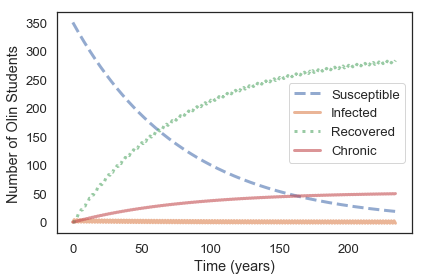

In [137]:
plot_results(results.S, results.I, results.R, results.C)

In [138]:
print (results.T)

0.0        0
1.0        1
2.0        2
3.0        3
4.0        4
5.0        5
6.0        6
7.0        7
8.0        8
9.0        9
10.0      10
11.0      11
12.0      12
13.0      13
14.0      14
15.0      15
16.0      16
17.0      17
18.0      18
19.0      19
20.0      20
21.0      21
22.0      22
23.0      23
24.0      24
25.0      25
26.0      26
27.0      27
28.0      28
29.0      29
        ... 
205.0    205
206.0    206
207.0    207
208.0    208
209.0    209
210.0    210
211.0    211
212.0    212
213.0    213
214.0    214
215.0    215
216.0    216
217.0    217
218.0    218
219.0    219
220.0    220
221.0    221
222.0    222
223.0    223
224.0    224
225.0    225
226.0    226
227.0    227
228.0    228
229.0    229
230.0    230
231.0    231
232.0    232
233.0    233
234.0    234
Name: T, Length: 235, dtype: object


# Results:
Our model predicts that it would take 235 years for there to be 50 chronic cases of Lyme disease at Olin, and therefore for Olin to sink under the weight of the bad press. We measured this by limiting the function to stop whenever the chronic stock got to 50 total Oliners. We printed the final time to determine what year the number reached over 50. 



### Limitations: 
There were several obvious limitations to our model. The most obvious of these in our minds is the fact that our data was not discrete and instead used continuous data, which was very obvious when it came to our infected count. It got the job done, because it reasonably accurately represented the rate at which people were being infected, but the amount of actively infected people generally hung very close to zero, and only accurately represented the rate by total sum. Also, the information would be useful, but it would only be very useful if people could live much longer and we could eliminate tons of factors we didn't account for. 

### Iteration:
Iteration was also a vital part of our process. The most important iteration that took place involved our question. Our question went through many variations, including forms that were more complicated, more simple, not even an SIR model, and plenty that just didn't make much sense. After we took out the positives from each of our models we combined them to make one more effective question that was still interesting. 

# Abstract

Question - How long would it take for Olin to reach 50 total chronically infected Lyme Disease students, and crack under the pressure of bad publicity?

Answer? - It would take 234 years before olin saw 50 total chronic cases of Lyme Disease in students.

Our final graph is able to show clearly the drop in susceptible students and the corresponding increase in chronic and recovered cases. The line representing chronic cases increases slowly over 234 years until it reaches 50.